In [20]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report)

In [21]:
# pd.set_option('display.max_rows', 200)

In [22]:
def get_max_emotion_score_df(file, emotion_col, emotion_count_col):
    df = pd.read_csv(file)
    df[emotion_col] = df[['joy','sadness','anger','love','thankfulness','fear']].idxmax(axis=1)
    df[emotion_count_col] = df[emotion_col].groupby(df[emotion_col]).transform(emotion_count_col)
    return df

In [23]:
def display_bar_chart(df, emotion_col, emotion_count_col):
    emotions = df[emotion_col].unique()
    emotions_count = []
    for emotion in emotions:
        emotions_count.append(df[df[emotion_col]==emotion][:1][emotion_count_col].item())
    # for emotion, count in zip(emotions, emotions_count):
    #    print(f"{emotion}: {count}")
    data_tuples = list(zip(emotions, emotions_count))
    df = pd.DataFrame(data_tuples, columns=['emotions','count'])
    plt.figure(figsize=(10,5))
    g = sns.barplot(x='emotions', y='count', data=df.sort_values('emotions'))

## Original Dataset

In [24]:
og_df = pd.read_csv("data/peter_pan_labelled_novel_dataset.csv")
og_df["count"] = og_df["emotions"].groupby(og_df["emotions"]).transform("count")
og_df.head()

,text,emotions,count
0,on ordinary occasions the boys would have swum...,joy,23
1,"what is it? he cried, shrinking",fear,35
2,she drifted in one direction and he was borne ...,joy,23
3,"'thank you, peter.'",thankfulness,22
4,i don't want to go to school and learn solemn ...,thankfulness,22


In [25]:
og_df

,text,emotions,count
0,on ordinary occasions the boys would have swum...,joy,23
1,"what is it? he cried, shrinking",fear,35
2,she drifted in one direction and he was borne ...,joy,23
3,"'thank you, peter.'",thankfulness,22
4,i don't want to go to school and learn solemn ...,thankfulness,22
...,...,...,...
157,"the point is, that there is more in my glass t...",anger,26
158,these things scared her a little.,fear,35
159,"'i am awfully glad she isn't dead,' said tootles.",joy,23
160,up at any moment of the night if one of her ch...,sadness,37


In [26]:
len(og_df)

162

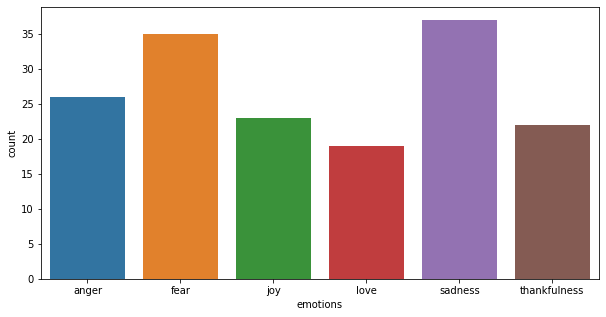

In [27]:
display_bar_chart(og_df, emotion_col="emotions", emotion_count_col="count")

## Predicted Dataset

In [30]:
pred_df = pd.read_csv("results/peter_pan_emotions_041121_111624.csv")
pred_df.head()

,text,joy,sadness,anger,love,thankfulness,fear
0,on ordinary occasions the boys would have swum...,0.740,0.924,0.091,0.353,0.374,0.228
1,"what is it? he cried, shrinking",0.297,0.226,0.943,0.835,0.778,0.100
2,she drifted in one direction and he was borne ...,0.362,0.503,0.267,0.568,0.953,0.133
3,"'thank you, peter.'",0.472,0.072,0.136,0.025,0.043,0.738
4,i don't want to go to school and learn solemn ...,0.537,0.546,0.603,0.690,0.218,0.456


In [31]:
len(pred_df)

162

# Model Threshold = 0.4

In [32]:
THRESH = 0.4

In [33]:
pred_df["joy_cat"] = (pred_df['joy'] > THRESH).astype(int)
pred_df["sadness_cat"] = (pred_df['sadness'] > THRESH).astype(int)
pred_df["anger_cat"] = (pred_df['anger'] > THRESH).astype(int)
pred_df["love_cat"] = (pred_df['love'] > THRESH).astype(int)
pred_df["thankfulness_cat"] = (pred_df['thankfulness'] > THRESH).astype(int)
pred_df["fear_cat"] = (pred_df['fear'] > THRESH).astype(int)

In [34]:
pred_df.head(2)

,text,joy,sadness,anger,love,thankfulness,fear,joy_cat,sadness_cat,anger_cat,love_cat,thankfulness_cat,fear_cat
0,on ordinary occasions the boys would have swum...,0.740,0.924,0.091,0.353,0.374,0.228,1,1,0,0,0,0
1,"what is it? he cried, shrinking",0.297,0.226,0.943,0.835,0.778,0.100,0,0,1,1,1,0


## Joining Dataframe

In [35]:
join_df = pd.merge(og_df, pred_df, on='text', how='left')

In [36]:
result_df = join_df.drop_duplicates()

In [37]:
print(f"Original Data: {len(og_df)}")
print(f"Pred Data: {len(pred_df)}")
print(f"Join Data: {len(result_df)}")

Original Data: 162
Pred Data: 162
Join Data: 162


In [38]:
result_df.to_csv("join_file.csv", index=False)

In [39]:
pred_list = []
for index, row in join_df.iterrows():
    text = row['text']
    if row["emotions"] == "anger" and row["anger_cat"] == 1:
        pred = "anger"
    if row["emotions"] == "fear" and row["fear_cat"] == 1:
        pred = "fear"
    if row["emotions"] == "joy" and row["joy_cat"] == 1:
        pred = "joy"
    if row["emotions"] == "love" and row["love_cat"] == 1:
        pred = "love"
    if row["emotions"] == "sadness" and row["sadness_cat"] == 1:
        pred = "sadness"
    if row["emotions"] == "thankfulness" and row["thankfulness_cat"] == 1:
        pred = "thankfulness"
    else:
        if row["anger_cat"] == 1:
            pred = "anger"
        if row["fear_cat"] == 1:
            pred = "fear"
        if row["joy_cat"] == 1:
            pred = "joy"
        if row["love_cat"] == 1:
            pred = "love"
        if row["sadness_cat"] == 1:
            pred = "sadness"
        if row["thankfulness_cat"] == 1:
            pred = "thankfulness"
    pred_list.append({"text": text, "pred": pred})

In [40]:
pred_df = pd.DataFrame(pred_list)

In [41]:
len(pred_df)

162

In [42]:
pred_df

,text,pred
0,on ordinary occasions the boys would have swum...,sadness
1,"what is it? he cried, shrinking",thankfulness
2,she drifted in one direction and he was borne ...,thankfulness
3,"'thank you, peter.'",fear
4,i don't want to go to school and learn solemn ...,love
...,...,...
157,"the point is, that there is more in my glass t...",love
158,these things scared her a little.,love
159,"'i am awfully glad she isn't dead,' said tootles.",love
160,up at any moment of the night if one of her ch...,thankfulness


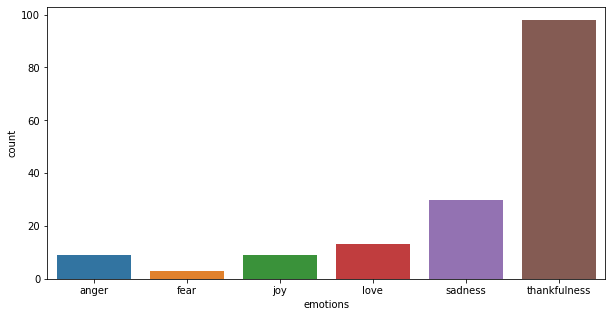

In [65]:
pred_df["count"] = pred_df["pred"].groupby(pred_df["pred"]).transform("count")
display_bar_chart(pred_df, emotion_col="pred", emotion_count_col="count")

### Categorize Emotions column (Original dataset)

In [43]:
og_df.dtypes

text        object
emotions    object
count        int64
dtype: object

In [44]:
og_df["emotions"] = og_df["emotions"].astype('category')

In [45]:
category_dict = dict(sorted(zip(og_df.emotions.cat.codes, og_df.emotions)))

In [46]:
for k, v in category_dict.items(): print(k, v)

0 anger
1 fear
2 joy
3 love
4 sadness
5 thankfulness


In [47]:
og_df.dtypes

text          object
emotions    category
count          int64
dtype: object

In [48]:
og_df["emotions_cat"] = og_df["emotions"].cat.codes
og_df.head()

,text,emotions,count,emotions_cat
0,on ordinary occasions the boys would have swum...,joy,23,2
1,"what is it? he cried, shrinking",fear,35,1
2,she drifted in one direction and he was borne ...,joy,23,2
3,"'thank you, peter.'",thankfulness,22,5
4,i don't want to go to school and learn solemn ...,thankfulness,22,5


### Categorize Emotions column (Predicted dataset)

In [49]:
pred_df.dtypes

text    object
pred    object
dtype: object

In [50]:
pred_df["pred"] = pred_df["pred"].astype('category')

In [51]:
category_dict = dict(sorted(zip(pred_df.pred.cat.codes, pred_df.pred)))

In [52]:
for k, v in category_dict.items(): print(k, v)

0 anger
1 fear
2 joy
3 love
4 sadness
5 thankfulness


In [53]:
pred_df.dtypes

text      object
pred    category
dtype: object

In [54]:
pred_df["pred_cat"] = pred_df["pred"].cat.codes

In [55]:
og_df.head()

,text,emotions,count,emotions_cat
0,on ordinary occasions the boys would have swum...,joy,23,2
1,"what is it? he cried, shrinking",fear,35,1
2,she drifted in one direction and he was borne ...,joy,23,2
3,"'thank you, peter.'",thankfulness,22,5
4,i don't want to go to school and learn solemn ...,thankfulness,22,5


In [56]:
pred_df.head()

,text,pred,pred_cat
0,on ordinary occasions the boys would have swum...,sadness,4
1,"what is it? he cried, shrinking",thankfulness,5
2,she drifted in one direction and he was borne ...,thankfulness,5
3,"'thank you, peter.'",fear,1
4,i don't want to go to school and learn solemn ...,love,3


## Confusion Matrix

In [57]:
confusion = confusion_matrix(og_df["emotions_cat"], pred_df["pred_cat"])

In [58]:
confusion

array([[ 1,  0,  4,  3,  4, 14],
       [ 3,  0,  1,  2,  6, 23],
       [ 1,  1,  1,  2,  4, 14],
       [ 0,  0,  0,  1,  3, 15],
       [ 3,  1,  2,  2,  8, 21],
       [ 1,  1,  1,  3,  5, 11]], dtype=int64)

In [59]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    """
    Source: https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html
    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10, 7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(
        accuracy, misclass))
    plt.show()

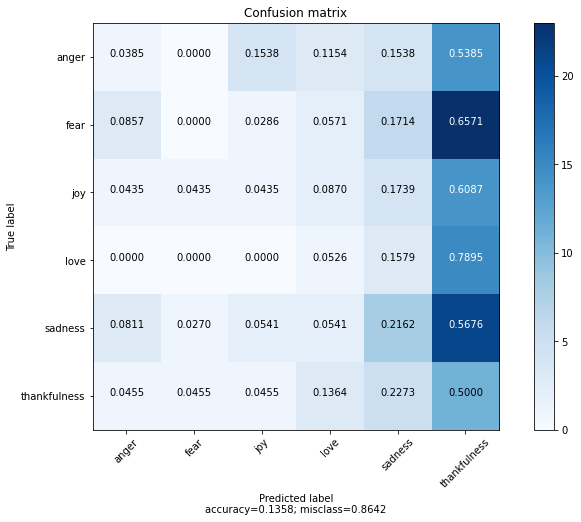

In [60]:
target_names = []
for k, v in category_dict.items(): target_names.append(v)
plot_confusion_matrix(cm=confusion, target_names=target_names, title='Confusion matrix')

### Precision-Recall Report
<div>
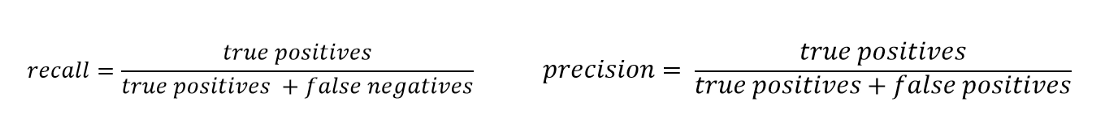
</div>

In [61]:
classes = []
for k, v in category_dict.items(): classes.append(v)
classes

['anger', 'fear', 'joy', 'love', 'sadness', 'thankfulness']

In [63]:
print(classification_report(og_df["emotions_cat"], pred_df["pred_cat"], target_names=classes))

              precision    recall  f1-score   support

       anger       0.11      0.04      0.06        26
        fear       0.00      0.00      0.00        35
         joy       0.11      0.04      0.06        23
        love       0.08      0.05      0.06        19
     sadness       0.27      0.22      0.24        37
thankfulness       0.11      0.50      0.18        22

    accuracy                           0.14       162
   macro avg       0.11      0.14      0.10       162
weighted avg       0.12      0.14      0.10       162



## Exporting Results

In [72]:
# pred_df[["text","pred"]].to_csv("results/peter_pan_emotions_predictions.csv", index=False)

In [73]:
# og_df.head(2)
# pred_df.head(2)

,text,emotions,count,emotions_cat
0,on ordinary occasions the boys would have swum...,joy,23,2
1,"what is it? he cried, shrinking",fear,35,1


In [75]:
final_df = pd.merge(og_df, pred_df, on='text', how='left')

In [76]:
final_df.head()

,text,emotions,count_x,emotions_cat,pred,pred_cat,count_y
0,on ordinary occasions the boys would have swum...,joy,23,2,sadness,4,30
1,"what is it? he cried, shrinking",fear,35,1,thankfulness,5,98
2,she drifted in one direction and he was borne ...,joy,23,2,thankfulness,5,98
3,"'thank you, peter.'",thankfulness,22,5,fear,1,3
4,i don't want to go to school and learn solemn ...,thankfulness,22,5,love,3,13


In [80]:
anger = final_df[(final_df["emotions"]=="anger") & (final_df["pred"]=="anger")]
anger

,text,emotions,count_x,emotions_cat,pred,pred_cat,count_y
29,the never bird became irritated; they have ver...,anger,26,0,anger,0,9


In [82]:
fear = final_df[(final_df["emotions"]=="fear") & (final_df["pred"]=="fear")]
fear

,text,emotions,count_x,emotions_cat,pred,pred_cat,count_y


In [83]:
joy = final_df[(final_df["emotions"]=="joy") & (final_df["pred"]=="joy")]
joy

,text,emotions,count_x,emotions_cat,pred,pred_cat,count_y
101,then he had leapt into her arms.,joy,23,2,joy,2,9


In [84]:
love = final_df[(final_df["emotions"]=="love") & (final_df["pred"]=="love")]
love

,text,emotions,count_x,emotions_cat,pred,pred_cat,count_y
93,i should love you in a beard,love,19,3,love,3,13


In [85]:
sadness = final_df[(final_df["emotions"]=="sadness") & (final_df["pred"]=="sadness")]
sadness

,text,emotions,count_x,emotions_cat,pred,pred_cat,count_y
10,wendy would have cried if michael had not been...,sadness,37,4,sadness,4,30
53,smee reflected. i can't think of a thing he sa...,sadness,37,4,sadness,4,30
73,"'at once,' wendy replied resolutely, for the h...",sadness,37,4,sadness,4,30
116,"starkey looked round for help, but all deserte...",sadness,37,4,sadness,4,30
120,me no let pirates hurt him.,sadness,37,4,sadness,4,30
146,mrs. darling put her hand to her heart and cried,sadness,37,4,sadness,4,30
152,"'no,' he answered, pretending indifference, 'i...",sadness,37,4,sadness,4,30
156,"of course we can, george, she cried",sadness,37,4,sadness,4,30


In [86]:
thankfulness = final_df[(final_df["emotions"]=="thankfulness") & (final_df["pred"]=="thankfulness")]
thankfulness

,text,emotions,count_x,emotions_cat,pred,pred_cat,count_y
11,then at last he understood and clutched the ne...,thankfulness,22,5,thankfulness,5,98
22,"i forget whether they found it, but at any rat...",thankfulness,22,5,thankfulness,5,98
34,he often said stocks were up and shares were d...,thankfulness,22,5,thankfulness,5,98
50,"peter was really the best dancer among them, b...",thankfulness,22,5,thankfulness,5,98
55,"but he was very honourable, and he sat on the ...",thankfulness,22,5,thankfulness,5,98
68,it is good. peter pan has spoken.,thankfulness,22,5,thankfulness,5,98
75,that is a pretty story and the end shows how g...,thankfulness,22,5,thankfulness,5,98
97,"'what is it?' she asked, anxious about him at ...",thankfulness,22,5,thankfulness,5,98
113,"he was so much the humblest of them, indeed he...",thankfulness,22,5,thankfulness,5,98
114,"peter, always sympathetic to the weaker side, ...",thankfulness,22,5,thankfulness,5,98
